In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

In [2]:
websites_filtered = pd.read_csv('../Data/labelled.csv',index_col='displayLink')

In [3]:
websites_filtered = websites_filtered[~websites_filtered['snippet'].isnull()]
websites_filtered.head()

,snippet,count,first,drug,label
displayLink,,,,,
drugs-center.biz,"Buy drugs online from Drugs-Center, the bigges...",6316,purchase,cocaine,1.0
prettycheaphighs.com,Purchase Molly XTC Pills online | Purchase Mol...,3018,purchase,molly,1.0
dopepartypills.com,buy ecstasy drugs online buy molly online buy ...,2964,swiss,mdma,1.0
goldmedications.com,Where to buy Crystal Meth online at lower pric...,2613,purchase,meth,2.0
omegaxresearchchem.com,Buy Molly MDMA Pills (Pure MDMA) – Omegax rese...,2486,purchase,molly,1.0


In a first step the websites were grouped by the displayLink, counting the number of frequencies and storing the last appeared snippet. Then the most popular websites were removed and the dataset was orderded by counts and labelled. The rows where there is no snippet are removed.

In [4]:
total = websites_filtered['count'].sum()
not_labelled = websites_filtered[websites_filtered['label'].isnull()]['count'].sum()
labelled = websites_filtered[~websites_filtered['label'].isnull()]['count'].sum()
print('From {} remaining websites {} were labelled and {} were not labelled.'.format(total, labelled, not_labelled))

From 245314 remaining websites 137765 were labelled and 107549 were not labelled.


In [5]:
not_drug = int(websites_filtered.groupby('label').sum().iloc[0])
drug = int(websites_filtered.groupby('label').sum().iloc[1])
dead_link = int(websites_filtered.groupby('label').sum().iloc[2])
print('From {} labelled websites, which were hit {} are drug webshops, {} are not drug webshops and {} are dead links.'\
      .format(labelled, drug, not_drug, dead_link))

From 137765 labelled websites, which were hit 37554 are drug webshops, 54174 are not drug webshops and 46037 are dead links.


## Analyzing the Drug query

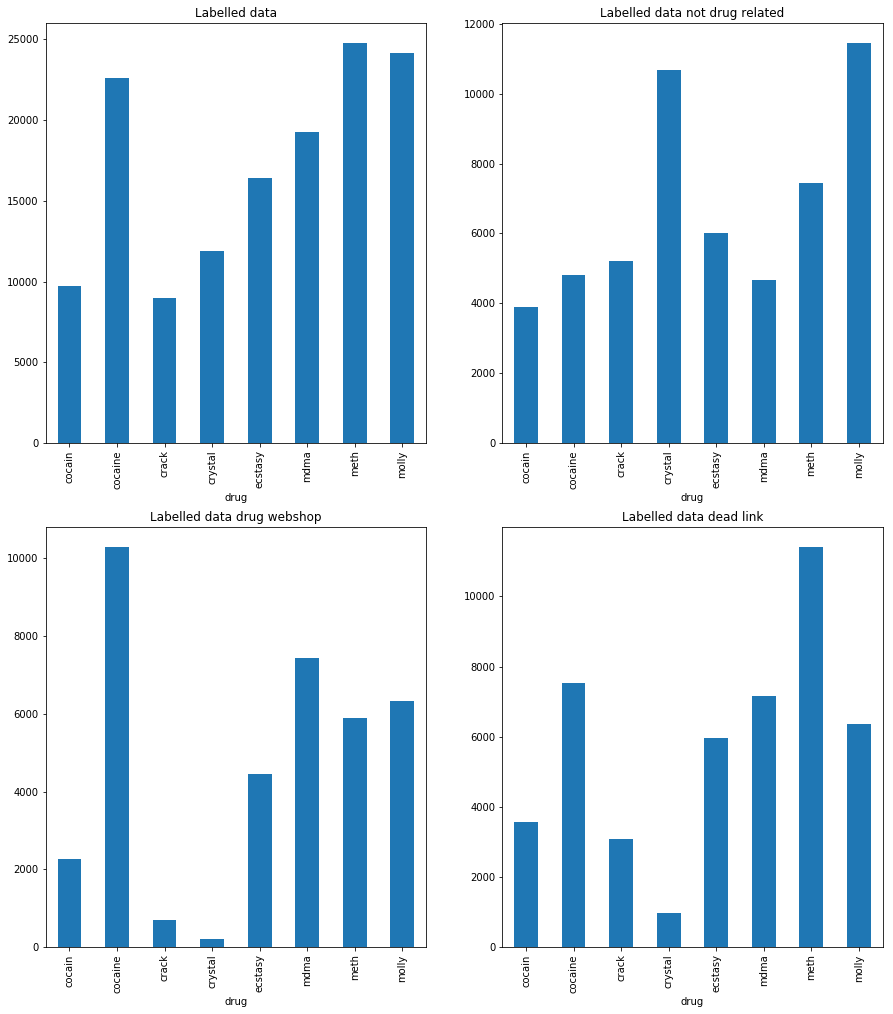

In [6]:
fig = plt.figure(figsize=(15,17))

ax = fig.add_subplot(221)
ax.set_title('Labelled data')
websites_filtered[~websites_filtered['label'].isnull()].groupby('drug').sum()['count']\
                                                .plot(kind='bar')
ax = fig.add_subplot(222)
ax.set_title('Labelled data not drug related')
websites_filtered[websites_filtered['label']==0].groupby('drug').sum()['count']\
                                                .plot(kind='bar')
ax = fig.add_subplot(223)
ax.set_title('Labelled data drug webshop')
websites_filtered[websites_filtered['label']==1].groupby('drug').sum()['count']\
                                                .plot(kind='bar')
ax = fig.add_subplot(224)
ax.set_title('Labelled data dead link')
websites_filtered[websites_filtered['label']==2].groupby('drug').sum()['count']\
                                                .plot(kind='bar')

Of the unlabelled ones, many are related to crystal and molly. I recommend dropping these and for further queries to focus on MDMA and cocaine.

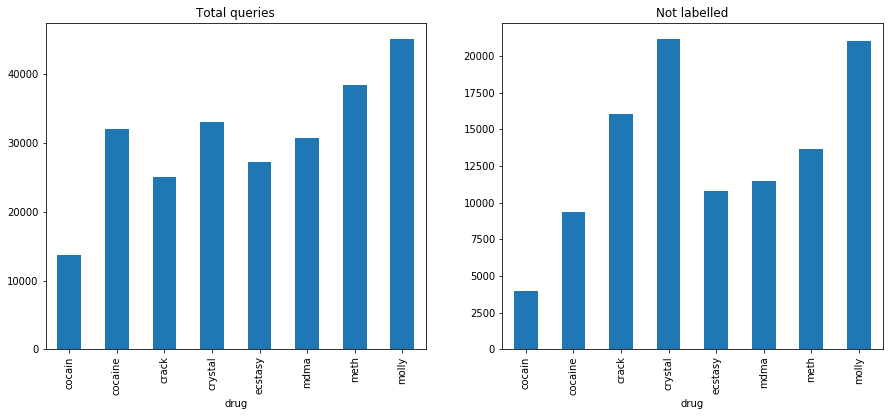

In [7]:
fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(121)
ax.set_title('Total queries')
websites_filtered.groupby('drug')['count'].sum().plot(kind='bar')

ax = fig.add_subplot(122)
ax.set_title('Not labelled')
websites_filtered[websites_filtered['label'].isnull()].groupby('drug').sum()['count']\
                                                .plot(kind='bar');

## Analyzing the first query

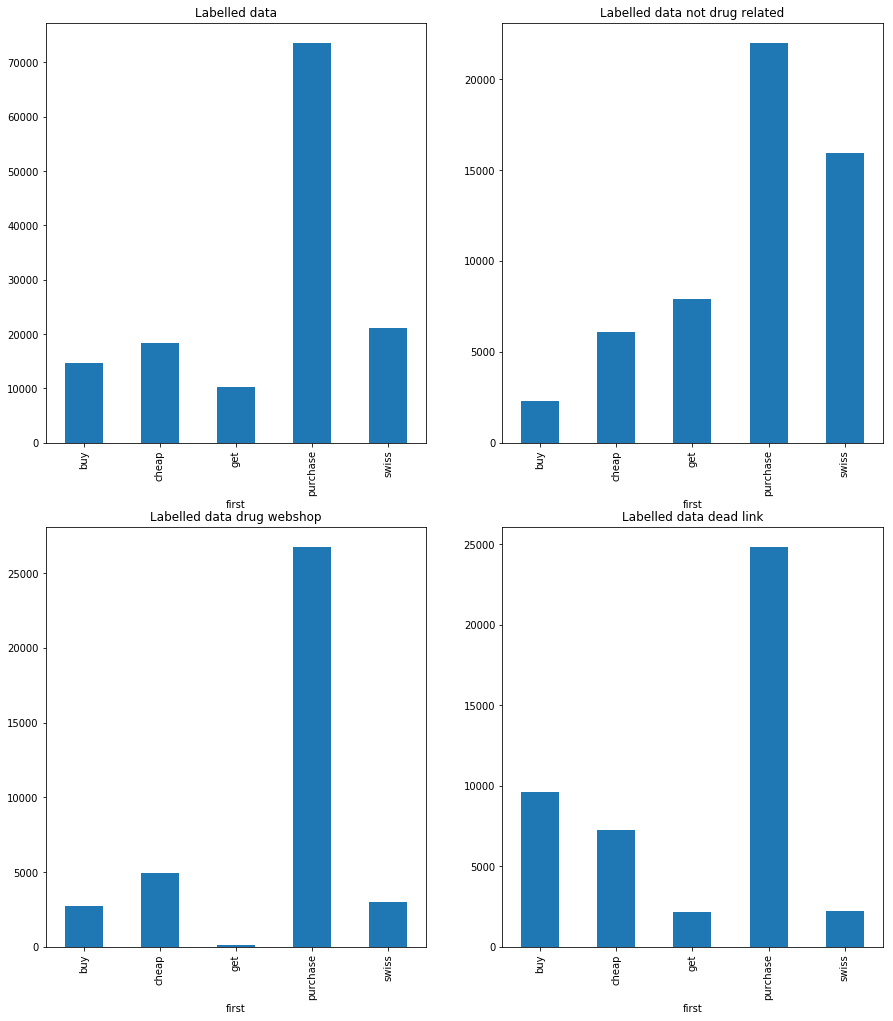

In [8]:
fig = plt.figure(figsize=(15,17))

ax = fig.add_subplot(221)
ax.set_title('Labelled data')
websites_filtered[~websites_filtered['label'].isnull()].groupby('first').sum()['count']\
                                                .plot(kind='bar')
ax = fig.add_subplot(222)
ax.set_title('Labelled data not drug related')
websites_filtered[websites_filtered['label']==0].groupby('first').sum()['count']\
                                                .plot(kind='bar')
ax = fig.add_subplot(223)
ax.set_title('Labelled data drug webshop')
websites_filtered[websites_filtered['label']==1].groupby('first').sum()['count']\
                                                .plot(kind='bar')
ax = fig.add_subplot(224)
ax.set_title('Labelled data dead link')
websites_filtered[websites_filtered['label']==2].groupby('first').sum()['count']\
                                                .plot(kind='bar')

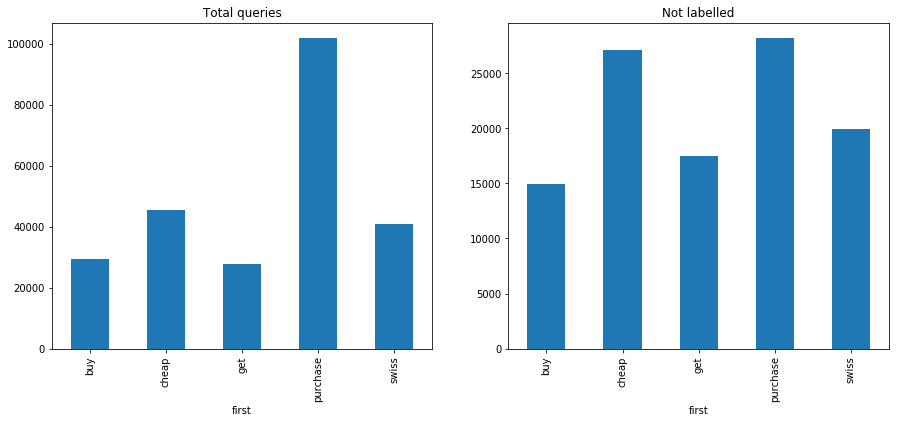

In [9]:
fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(121)
ax.set_title('Total queries')
websites_filtered.groupby('first')['count'].sum().plot(kind='bar')

ax = fig.add_subplot(122)
ax.set_title('Not labelled')
websites_filtered[websites_filtered['label'].isnull()].groupby('first').sum()['count']\
                                                .plot(kind='bar');

## Keeping purchase and (cocaine or mdma)

In [10]:
coke_mdma = websites_filtered[(websites_filtered['first'].isin(['purchase'])) \
                              & ((websites_filtered['drug'].isin(['cocaine','mdma'])))]

In [11]:
cm_n = coke_mdma[coke_mdma['label'] == 0]['count'].sum()
cm_s = coke_mdma[coke_mdma['label'] == 1]['count'].sum()
cm_d = coke_mdma[coke_mdma['label'] == 2]['count'].sum()
cm_nl = coke_mdma[coke_mdma['label'].isnull()]['count'].sum()
cm_l = coke_mdma[~coke_mdma['label'].isnull()]['count'].sum()
cm = coke_mdma['count'].sum()
print('Of {} responses to the query of purchase and cocaine or mdma, {} were labelled and {} were not. {} were drug related webshops {} were not and {} were dead links.'\
      .format(cm,cm_l,cm_nl,cm_s,cm_n,cm_d))

Of 31303 responses to the query of purchase and cocaine or mdma, 24402 were labelled and 6901 were not. 10209 were drug related webshops 4924 were not and 9269 were dead links.


In [20]:
print('The remaining dataset is of length {}. {} are drug webshops, {} are not and {} are dead. {} are unlabelled.'
      .format(len(coke_mdma),len(coke_mdma[coke_mdma['label']==1]),len(coke_mdma[coke_mdma['label']==0]),
              len(coke_mdma[coke_mdma['label']==2]), len(coke_mdma[coke_mdma['label'].isnull()])))

The remaining dataset is of length 519. 17 are drug webshops, 17 are not and 25 are dead. 460 are unlabelled.


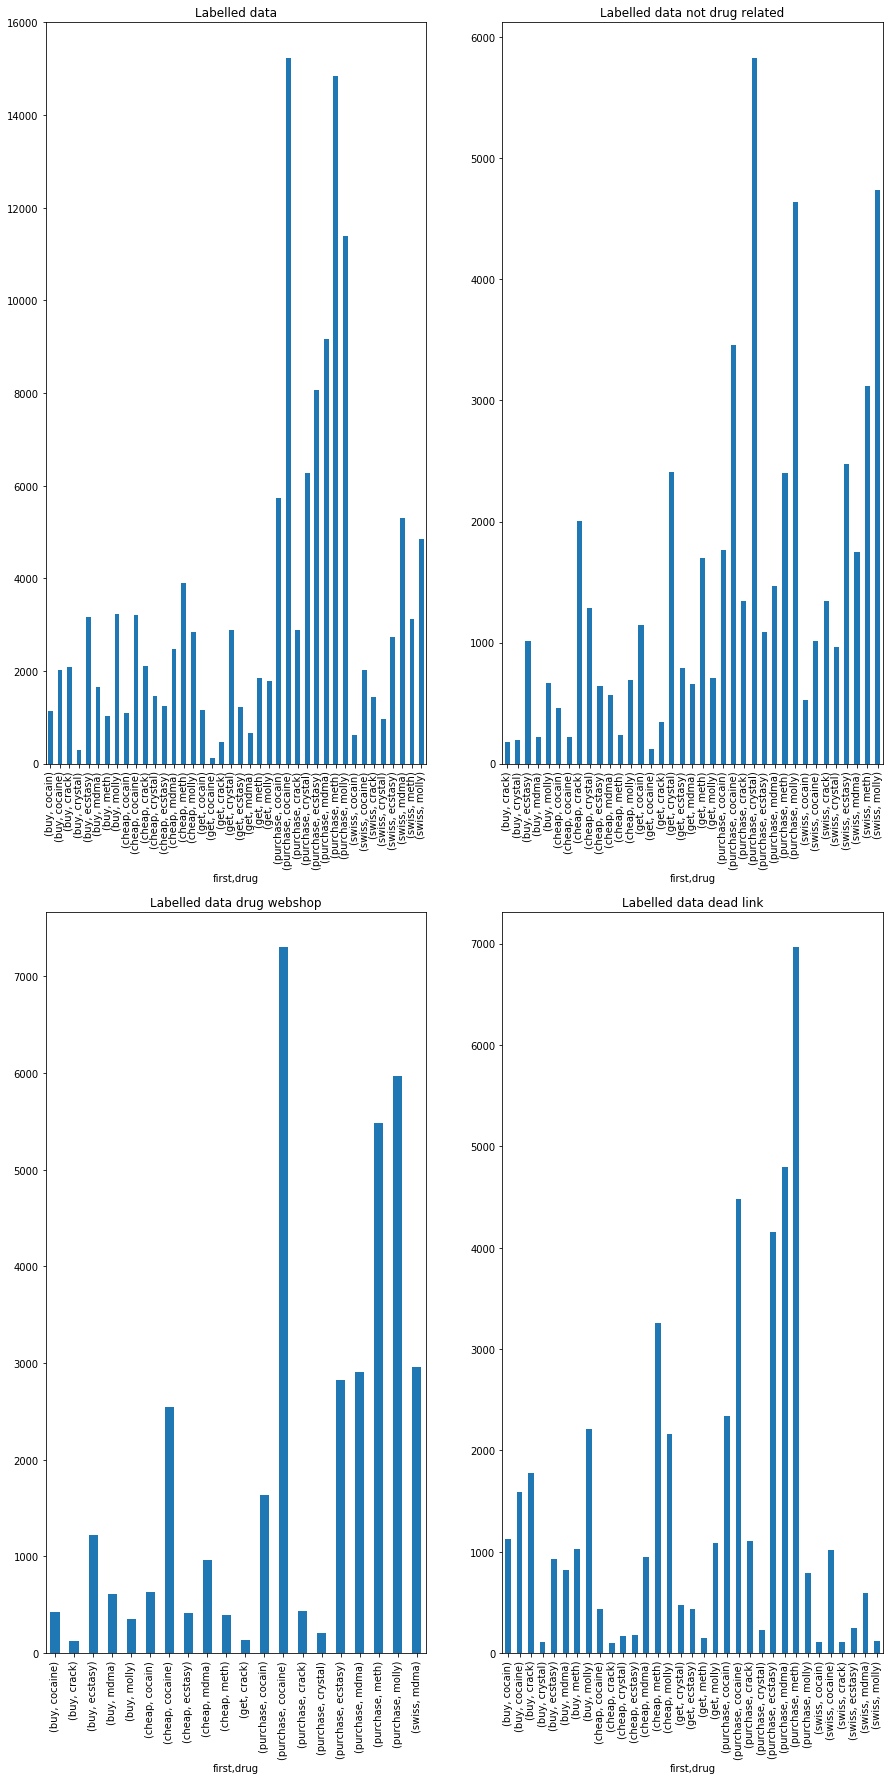

In [13]:
fig = plt.figure(figsize=(15,30))

ax = fig.add_subplot(221)
ax.set_title('Labelled data')
websites_filtered[~websites_filtered['label'].isnull()].groupby(['first','drug']).sum()['count']\
                                             .plot(kind='bar');
ax = fig.add_subplot(222)
ax.set_title('Labelled data not drug related')
websites_filtered[websites_filtered['label']==0].groupby(['first','drug']).sum()['count']\
                                                .plot(kind='bar')
ax = fig.add_subplot(223)
ax.set_title('Labelled data drug webshop')
websites_filtered[websites_filtered['label']==1].groupby(['first','drug']).sum()['count']\
                                                .plot(kind='bar')
ax = fig.add_subplot(224)
ax.set_title('Labelled data dead link')
websites_filtered[websites_filtered['label']==2].groupby(['first','drug']).sum()['count']\
                                                .plot(kind='bar')

In [16]:
coke_mdma.head(30)

,snippet,count,first,drug,label
displayLink,,,,,
drugs-center.biz,"Buy drugs online from Drugs-Center, the bigges...",6316,purchase,cocaine,1.0
buycocaineforsale.com,Buy Bolivian Cocaine | Bolivian Cocaine for sale,2219,purchase,cocaine,2.0
www.rchemicals4us.com,MDMA Molly Online Buy Online| MDMA For Sale On...,1627,purchase,mdma,2.0
ps3.wonderhowto.com,"Oct 9, 2013 ... If you're trying to get rich q...",1416,purchase,cocaine,0.0
gta.wikia.com,"In order to get access, the player must first ...",644,purchase,cocaine,0.0
nayochem.com,Buy mdma crystal | MDMA for sale at a very che...,642,purchase,mdma,1.0
firsttrustchemicals.com,"MDMA Powder Crystals, Buy MDMA POWDER AND CRYS...",632,purchase,mdma,2.0
www.jamdeal.com,Cocain for sale / JamDeal,620,purchase,cocaine,0.0
newpdsuslmzqazvr.onion.link,"Peoples drug store, the number one deep web dr...",534,purchase,cocaine,2.0
